<a href="https://colab.research.google.com/github/anurag0308/Email_reply_prediciton/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement: To predict whether a given mail will get a reply or not.

1. Given Dataset: A text file with emails and their metadata in hierarchy
2. To predict: Reply/ No reply

# Our Approach:
1. Load Data
2. Extracting Data: Extracting text email subject and body data from the text file
3. Text Data Cleaning and Preprocessing
4. Feature engineering : extracting additional features from emails (such as header subject length, email body lengths, recepient count, attachment count)
5. Modelling: 
              5.1 BERT Embeddings from the text data
              5.2 combine with other features
              5.3 train test split
              5.4 predict using MLP classifier     
              5.5 check F-1 score and plot ROC       


 Importing Libraries

In [ ]:
import csv
import pandas as pd
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() #create a object of library
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')

from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f= open("data.csv","w+")

In [ ]:
f1 = open("/content/drive/My Drive/Bugendaitech/data (1).txt","r")  
if f1.mode == 'r':
    contents = f1.readlines()

In [ ]:
print(contents[19].rstrip('\n'))

HEADER_CONTENT cc: Gary Hickerson/HOU/ECT@ECT, John Greene/LON/ECT@ECT, Michael W


# 2. Extracting Data

In [ ]:
"""
This method extracts emails 
input: list of contents
returns: list of emails
"""
def extract_mail(contents):
    emails = {}
    tsi = [] #list of index where 'THREAD_START' is present 
    for i in range(len(contents)):
        if 'THREAD_START' in contents[i].rstrip('\n'):
            tsi.append(i)
    for i in range(len(tsi)-1):
        emails[i] = contents[tsi[i]:tsi[i+1]]
    return emails

In [ ]:
emails = extract_mail(contents)

In [ ]:
emails[1]

['THREAD_START \n',
 'HEADER_KEYWORDS sara signers ect greene shackleton\n',
 'HEADER_SUBJECT Authorized Signers\n',
 'EMAIL_START \n',
 'HEADER_CONTENT cc: Gary Hickerson/HOU/ECT@ECT, John Greene/LON/ECT@ECT, Michael W\n',
 'Bradley/HOU/ECT@ECT, Aneela Charania/HOU/ECT@ECT, Theresa T\n',
 'Brogan/HOU/ECT@ECT\n',
 '\n',
 'Patrick and Michelle,\n',
 'We added both of you to the list for Authorized Signers for ECT Investments,\n',
 'Inc. for transfer of funds. Authorization requires one commercial and one\n',
 'commercial support signature.\n',
 'Thanks. Sheila\n',
 '\n',
 'Current Authorized Signers for transfer of funds for ECT Investments, Inc.\n',
 'are M. Bradley, J. Greene, G. Hickerson, P. Lewis and M. Ruch.\n',
 'EMAIL_END \n',
 'FORWARD_START \n',
 'HEADER_CONTENT cc: John Greene/LON/ECT@ECT, Israel Estrada/Corp/Enron@ENRON, Aneela\n',
 'Charania/HOU/ECT@ECT\n',
 '\n',
 'Sara and Samantha,\n',
 'When will ECT Investments be signed so we can send an updated copy to our\n',
 'Prim

In [ ]:
"""
This method extracts email body of a particular email
Input: list of emails
Returns: Dictionary mail_body with keys as index of mails and values as corresponding text of mail body
"""

def extract_mail_body1(emails):  
    lust = list(emails.values())
    mail_body = {}
    for mails in range(len(lust)):
        temp = lust[mails]
        mbsi = []
        mbei = []
        #print(temp)
        for line in range(len(temp)):
            #print(temp[line])
            if 'HEADER_CONTENT' in temp[line]:
                mbsi.append(line)
                break
                #print(mbsi)
        for line in range(len(temp)):
            if 'EMAIL_END' in temp[line]:
                mbei.append(line)
        if mbei != []:
          mail_body[mails] = temp[mbsi[0]:mbei[0]]
        else:
          mail_body[mails] = 'NA'

    return mail_body

In [ ]:
mail_body1 = extract_mail_body1(emails)

In [ ]:
"""
This method checks whether mail has reply or not. Also, returns number of mails
Input: list of emails
Returns: reply_bool: dictionary indicating whether email has reply or not
        reply_count: No. of replies
"""

def if_reply(emails):
    lust = list(emails.values())
    reply_bool = {}
    reply_count = {}
    for mails in range(len(lust)):
        temp = lust[mails]
        rsi = []
        #print(tem
        for line in range(len(temp)):
            #print(temp[line])
            if 'REPLY_START' in temp[line].rstrip('\n'):
              rsi.append('yes')
        #print(rsi)

        if rsi != []:
          reply_bool[mails] = rsi[0]
        else:
          reply_bool[mails] = 'no'
        
        if rsi != []:
          reply_count[mails] = len(rsi)
        else:
          reply_count[mails] = 0
    
          
    return reply_bool,reply_count



In [ ]:
reply_bool_count_list = if_reply(emails)  
reply_bools = reply_bool_count_list[0]
reply_counts = reply_bool_count_list[1]

emails 8 has 2 replies and 17 has 3 replies # just to cross check

In [ ]:
"""
This method checks whether mail has forward or not. Also, returns number of forwards for the mail
Input: list of emails
Returns: forward_bool: dictionary indicating whether email has reply or not
        forward_count: No. of replies
"""

def forward_counter(emails):
    lust = list(emails.values())
    forward_bool = {}
    forward_count = {}
    for mails in range(len(lust)):
        temp = lust[mails]
        fsi = [] #forward_start_index
        #print(temp)
        for line in range(len(temp)):
            if 'FORWARD_START' in temp[line].rstrip('\n'):
              fsi.append('yes')
        
        if fsi != []:
          forward_bool[mails] = fsi[0]
        else:
          forward_bool[mails] = 'no'
        
        if fsi != []:
          forward_count[mails] = len(fsi)
        else:
          forward_count[mails] = 0

    return forward_bool,forward_count

In [ ]:
forward_bool_counts_list = forward_counter(emails)

In [ ]:
forward_bools = forward_bool_counts_list[0]
forward_counts = forward_bool_counts_list[1]

Emial 7 has 3 forwards and 10 has 0  and 422 has 2 and 666 has 0 to cross check

In [ ]:
"""
This method extracts HEADER_SUBJECT
Input: list of emails
Returns:header_sub: dictionary with keys as index and values as header subjects

"""
def header_subject_extractor(emails):
    lust = list(emails.values())
    header_sub = {}
    for mails in range(len(lust)):
        temp = lust[mails]
        hsi = 0 #header_subject_index
        for line in range(len(temp)):
            if 'HEADER_SUBJECT' in temp[line].rstrip('\n'):
              hsi = line
        
        header_sub[mails] = temp[hsi].strip('HEADER_SUBJECT\n')

    return header_sub
  


In [ ]:
header_subject = header_subject_extractor(emails)


In [ ]:
"""
This method counts no. of attachment
Input: 
Returns:header_sub: dictionary with keys as index and values as no. of attachments 

"""
def attachment_counter():
  mails = extract_mail_body1(emails)
  attachCount = {}
  attachCount.fromkeys([i for i in range(len(mail_body1))])
  a1 = []
  for i in range(len(mails)):
    a1.append(str(mails[i]))
    attachCount[i] = a1[i].count("See attached file")
  return attachCount

In [ ]:
attachment_counts = attachment_counter()

In [ ]:
"""
This method counts no. of recepient
Input: 
Returns:header_sub: dictionary with keys as index and values as no. of recepients 

"""
def recepient_counter():
  mails = extract_mail_body1(emails)
  recepientCount = {}
  recepientCount.fromkeys([i for i in range(len(mails))])
  a2 = []
  for i in range(len(mails)):
    b = str(mail_body1[i])
    start = b.find('HEADER_CONTENT') + 14
    end = b.find("\\n', '\\n'", start)
    a2.append(b[start:end])
    recepientCount[i] = a2[i].count("@")
  return recepientCount

In [ ]:
recepient_counts = recepient_counter()

In [ ]:
dicts = mail_body1,reply_bools,reply_counts,forward_bools,forward_counts,header_subject,attachment_counts,recepient_counts

In [ ]:
import csv
with open('my_data.csv', 'w') as ofile:
    writer = csv.writer(ofile, delimiter=',')
    writer.writerow(['content(mail body)','if_reply(yes/no)','reply_count','if_forward(yes/no)','forward_count','header_subject','attachment_counts','recepient_counts'])
    for key in mail_body1.keys():
        writer.writerow([d[key] for d in dicts])

# 3. Text Data Cleaning & Preprocessing

Importing Preprocessing Libraries

In [ ]:
import pandas as pd
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() #create a object of library
from nltk.tokenize import word_tokenize


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english')) #create a list of unique stopwords of english language

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv('my_data.csv')
data.head()


,content(mail body),if_reply(yes/no),reply_count,if_forward(yes/no),forward_count,header_subject,attachment_counts,recepient_counts
0,"['HEADER_CONTENT cc:\n', '\n', 'Sara -\n', 'SM...",no,0,no,0,SM,0,0
1,['HEADER_CONTENT cc: Gary Hickerson/HOU/ECT@EC...,yes,1,yes,1,Authorized Signers,0,5
2,"['HEADER_CONTENT cc:\n', '\n', 'Sara\n', '\n',...",yes,1,no,0,ISDA Master Agreements,0,0
3,"['HEADER_CONTENT cc: ""Abba Gana, Mustapha"" <Ab...",yes,1,no,0,"From MEGA, Consent to Assignment....",0,1
4,"[""HEADER_CONTENT In connection with Enron's PA...",no,0,yes,2,Enron PATS 2000-1,9,0


In [ ]:
"""
This method cleans data in a text column
input: col_name
returns: cleaned data column
"""
def data_cleaner(col_name):
  for i in range(len(data[col_name])):
    if type(data['content(mail body)'][i]) == str:
      data.loc[i,col_name] = re.sub(r"http\S+", "", data[col_name][i])  # for url
      data.loc[i,col_name] = re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", "", data[col_name][i]) # for email
      data.loc[i,col_name] = re.sub("@[^\s]+", "", data[col_name][i]) # for username
      data.loc[i,col_name] = re.sub("#[^\s]+", "", data[col_name][i]) # for trending # words
      data.loc[i,col_name] = re.sub("\$\w*", "", data[col_name][i])
      data.loc[i,col_name] = data[col_name][i].replace("\\n","")
      data.loc[i,col_name] = data[col_name][i].replace("'","")
      data.loc[i,col_name] = data[col_name][i].replace("HEADER_CONTENT cc","")
      data.loc[i,col_name] = data[col_name][i].replace("cc","")
      data.loc[i,col_name] = data[col_name][i].replace("HEADER_CONTENT","")
  return data[col_name]

In [ ]:
"""
This method preprocesses (tokenization, lemmatization, stopword removal, punctuations) data in a text column
input: col_name
returns: preprocessed data column
"""
def data_preprocessing(col_name):
  for i in range(len(data[col_name])):
    if type(data[col_name][i]) == str:
      word_tokens = word_tokenize(data[col_name][i])
      lemmatized_words = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words]
      lemmatized_words1 = " ".join([word.lower() for word in lemmatized_words if word not in string.punctuation])
      data.loc[i,col_name] = lemmatized_words1
  return data[col_name]


In [ ]:
data['content(mail body)'] = data_cleaner('content(mail body)')
data['header_subject'] = data_cleaner('header_subject')

In [ ]:
data['content(mail body)'] = data_preprocessing('content(mail body)')


In [ ]:
data['header_subject'] = data_preprocessing('header_subject')

In [ ]:
data.head()

,content(mail body),if_reply(yes/no),reply_count,if_forward(yes/no),forward_count,header_subject,attachment_counts,recepient_counts
0,sara smud gave u version isda agreement 6 week...,no,0,no,0,sm,0,0
1,gary hickerson/hou/ect john greene/lon/ect mic...,yes,1,yes,1,authorized signers,0,5
2,sara it agreed ena ectric c/p referred way nov...,yes,1,no,0,isda master agreements,0,0
3,`` abba gana mustapha '' abbaganam susan pleas...,yes,1,no,0,from mega consent assignment ...,0,1
4,`` in connection enrons pats offering attachin...,no,0,yes,2,enron pats 2000-1,9,0


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git #Preprocessing Library

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-1fgdagpk
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-1fgdagpk
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=9e1ec3aa3b3b9211d10bd36f8a541eb48b74c60100aa2c67f3d23afa68a4d2f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-0a2cvglz/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
"""
This method further cleans data in a text column
input: col_name
returns: preprocessed data column
"""
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
data['content(mail body)'] = data['content(mail body)'].apply(lambda x: get_clean(x))

In [ ]:
data['header_subject'] = data['header_subject'].apply(lambda x: get_clean(x))

In [ ]:
data.head()

,content(mail body),if_reply(yes/no),reply_count,if_forward(yes/no),forward_count,header_subject,attachment_counts,recepient_counts
0,sara smud gave you version isda agreement 6 we...,no,0,no,0,sm,0,0
1,gary hickersonhouect john greenelonect michael...,yes,1,yes,1,authorized signers,0,5
2,sara it agreed ena ectric cp referred way nova...,yes,1,no,0,isda master agreements,0,0
3,abba gana mustapha abbaganam susan please find...,yes,1,no,0,from mega consent assignment,0,1
4,in connection enrons pats offering attaching c...,no,0,yes,2,enron pats 201,9,0


# 4. Feature Engineering

FEATURE ENGINEERING : [Feature Engineering has been done in order to extract features from existing features after going this research papaer.](https://https://cseweb.ucsd.edu/classes/fa17/cse291-b/reading/sigir17a_email.pdf)

According the research paper, some of the features which contributed the most (in addition to the above present) to email reply prediction are: (in decreasing order of importance) 



1.   EmailSubjectLen
2.   NumOfReceivers
3.   EmailBodyLen
4.   UserJobTitleSender 
5.   NumofAttachment

Feature 2 and Feature 5 has been added as recepient_count and attachment_count at the time of extracting the data from text file respectively.

We will create two more features which are Feature 1 & Feature 3. Therefore I've created 4 features extra but I've used only two features for modelling as I wanted to increase the no. of features one by one.

but I have used:

1. EmailSubjectLen as content_mail_body_len
2. EmailBodyLen as header_subject_len

**Also, I have used BERT embeddings for the header subject and content of mail body as features.**

We can try other embedding likes word2vec, Glove, doc2vec but BERT is state of the art of the model that's why decided to go ahead with that only.














In [ ]:
#FEATURE ENGINEERING

In [ ]:
# extracts header subject length for a row in dataframe
def header_subject_len(x):
  xlist = x.split() 
  return sum(1 for x in xlist)


In [ ]:
# extracts mail body length for a row in dataframe
def content_mail_body_len(x):
  ylist = x.split()
  return sum(1 for x in ylist)

In [ ]:
data['header_subject_len'] = data['header_subject'].apply(lambda x:header_subject_len(x))

In [ ]:
data['content_mail_body_len'] = data['content(mail body)'].apply(lambda x:content_mail_body_len(x))

In [ ]:
#modelling without engineered features such as recepient_count and attachment_count

In [ ]:
data = data[['content(mail body)', 'if_reply(yes/no)', 'reply_count',
       'if_forward(yes/no)', 'forward_count', 'header_subject', 'header_subject_len',
       'content_mail_body_len']]

In [ ]:
data.head()

,content(mail body),if_reply(yes/no),reply_count,if_forward(yes/no),forward_count,header_subject,header_subject_len,content_mail_body_len
0,sara smud gave you version isda agreement 6 we...,no,0,no,0,sm,1,49
1,gary hickersonhouect john greenelonect michael...,yes,1,yes,1,authorized signers,2,52
2,sara it agreed ena ectric cp referred way nova...,yes,1,no,0,isda master agreements,3,23
3,abba gana mustapha abbaganam susan please find...,yes,1,no,0,from mega consent assignment,4,102
4,in connection enrons pats offering attaching c...,no,0,yes,2,enron pats 201,3,144


In [ ]:
data.columns

Index(['content(mail body)', 'if_reply(yes/no)', 'reply_count',
       'if_forward(yes/no)', 'forward_count', 'header_subject',
       'header_subject_len', 'content_mail_body_len'],
      dtype='object')

In [ ]:
len(data)

2999

Now, we need to extract features from the content and subject text data. We will be using BERT embeddings for it.

## 5. Modelling

In [ ]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
# checking missing values
data.isna().sum()

content(mail body)       0
if_reply(yes/no)         0
reply_count              0
if_forward(yes/no)       0
forward_count            0
header_subject           0
header_subject_len       0
content_mail_body_len    0
dtype: int64

In [ ]:
text_data = '[CLS] '+data['header_subject']+'[SEP]'+data['content(mail body)'] #appending special tags for tokens in BERT for input

In [ ]:
text_data

0       [CLS] sm[SEP]sara smud gave you version isda a...
1       [CLS] authorized signers[SEP]gary hickersonhou...
2       [CLS] isda master agreements[SEP]sara it agree...
3       [CLS] from mega consent assignment[SEP]abba ga...
4       [CLS] enron pats 201[SEP]in connection enrons ...
                              ...                        
2994                                        [CLS] re[SEP]
2995    [CLS] re imbalance trade cng[SEP]pricehouect d...
2996    [CLS] re meeting[SEP]to chris germanyhouect su...
2997    [CLS] capacity releases[SEP]scott nealhouect d...
2998    [CLS] re devonian resources[SEP]i believe mete...
Length: 2999, dtype: object

In [ ]:
text_list = list(text_data)

In [ ]:
# Extracting Embeddings from BERT
# Used BERT as a service to extract embeddings 
"""
from bert_serving.client import BertClient
bc = BertClient()
embed_matrix = bc.encode(text_list)

with open('embed_matrix.npy', 'wb') as f:
    np.save(f, embed_matrix)
"""

"\nfrom bert_serving.client import BertClient\nbc = BertClient()\nembed_matrix = bc.encode(text_list)\n\nwith open('embed_matrix.npy', 'wb') as f:\n    np.save(f, embed_matrix)\n"

In [ ]:
# Using saved extracted BERT embeddings 
embed_matrix = np.load('/content/drive/MyDrive/Bugendaitech/embed_matrix.npy')

In [ ]:
print("No. of mail instances:",embed_matrix.shape[0])
print("Dimension of a single embedding:",embed_matrix.shape[1])

No. of mail instances: 2999
Dimension of a single embedding: 768


In [ ]:
df = pd.DataFrame(embed_matrix) # text embeddings as dataframe
df = pd.concat([df, data], axis = 1) # Concatenating text embeddings with rest of data
Xdata = df.drop(columns= ['if_reply(yes/no)','content(mail body)', 'header_subject']) #removing repeated columns
Xdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,reply_count,if_forward(yes/no),forward_count,header_subject_len,content_mail_body_len
0,-0.061652,-0.301240,0.988962,-0.509645,0.307886,-0.345592,0.100001,0.150530,-0.077637,-0.006422,0.274483,-0.254729,0.409971,0.274903,-0.482126,0.512525,0.313160,0.079097,-0.044677,0.211474,0.464835,0.123519,0.038805,-0.343659,-0.053606,0.069053,-0.279016,-0.306080,-0.429232,0.235972,0.271214,-0.010696,-0.254816,-0.422443,-0.313558,-0.129044,0.230748,0.594568,-0.115863,0.634683,...,-0.512087,-0.181524,0.086833,-0.038490,-0.275124,0.252091,0.336690,0.700430,-0.275691,-0.331005,-0.096895,-0.554076,-0.074712,-0.045809,0.199183,0.211189,0.239399,-0.373822,-0.066665,-0.032674,-0.059337,0.304323,-0.234559,-0.485936,-1.022841,-0.524635,-0.349269,-0.109370,-0.168632,-0.340974,0.205476,-0.359956,-0.687200,0.035915,-0.047075,0,no,0,1,49
1,-0.119618,0.233673,0.388971,-0.284565,0.366891,-0.263530,-0.156496,-0.175474,0.010741,-0.221121,0.029777,0.037707,-0.043904,0.203864,-0.127190,0.904664,-0.001759,-0.056294,-0.148297,0.013065,0.098659,-0.222912,0.230160,0.085756,0.220582,0.221145,-0.243964,-0.219535,-0.426963,0.513781,0.862359,0.386674,0.068511,-0.662784,-0.336401,-0.108923,0.222039,0.322167,0.088777,0.690272,...,0.269197,-0.177714,-0.234797,0.168693,0.125758,0.293837,0.017818,-0.176463,0.245259,-0.205534,-0.377857,-0.351560,0.163702,-0.249110,0.016858,0.155448,0.451710,-0.103035,0.300852,-0.038376,0.019314,0.048110,0.003934,-0.460683,-0.319305,-0.549644,-0.009801,-0.584275,-0.248310,-0.133273,0.429948,-0.275808,-0.050797,0.024669,-0.129476,1,yes,1,2,52
2,0.118571,-0.239992,0.892090,-0.590311,0.244341,-0.461786,-0.424682,-0.319129,-0.050232,-0.177460,0.188866,0.144373,0.701320,0.404683,0.019416,0.599780,-0.058971,-0.200306,0.275102,-0.244152,0.352123,0.228530,-0.120158,-0.128495,0.257860,0.362371,-0.274145,-0.482561,-0.302005,0.004656,0.664816,0.270447,-0.571720,-0.580444,0.045438,-0.121917,0.219843,0.188815,-0.414748,0.365277,...,-0.394504,0.199963,0.259205,0.015664,0.468405,0.214694,0.430537,0.294235,0.243053,-0.345951,-0.121678,-0.725440,-0.132304,0.002526,0.102933,-0.036722,0.039097,-0.071635,-0.068161,-0.289076,-0.555402,-0.060344,-0.201275,-0.547013,-0.818709,-0.551684,-0.339579,-0.215057,-0.119362,-0.254128,0.095207,-0.629730,-0.455287,0.088357,0.080491,1,no,0,3,23
3,0.069110,0.352247,0.030482,-0.891156,0.613150,-0.256157,0.327572,-0.085017,0.081322,0.259983,0.134138,0.053425,-0.030330,0.223629,0.088144,1.000456,0.392520,0.024163,-0.121637,-0.304955,0.157775,0.084510,-0.203554,-0.368076,0.215218,0.440867,0.163690,-0.065575,-0.682051,0.119944,0.102716,0.146327,-0.154448,-0.394389,-0.293356,-0.062651,0.252492,0.162945,-0.106116,0.297655,...,0.037878,0.062055,0.355162,-0.116535,0.000099,0.664152,0.387566,0.558281,-0.167727,-0.393455,-0.224051,-0.219993,-0.122360,0.027801,-0.130450,-0.235176,-0.057766,-0.014512,0.034160,-0.207622,-0.144044,0.367071,-0.061523,-0.362517,-0.525074,-0.603688,-0.714121,0.098793,0.126863,-0.145168,0.230213,-0.557157,-0.499219,-0.156966,0.088316,1,no,0,4,102
4,0.085441,-0.024253,0.719638,-0.547666,0.231693,0.099816,-0.165823,0.256770,-0.016716,0.170235,-0.194906,-0.454936,0.248666,0.385948,-0.273022,0.597467,-0.161642,0.236268,-0.222633,-0.043212,0.111046,0.140017,-0.037486,-0.441277,0.614327,-0.078916,-0.117642,-0.622913,-0.434842,0.208062,0.879462,0.211798,0.091427,-0.524002,-0.003602,-0.490857,0.239493,-0.157967,0.206943,0.463441,...,-0.570396,0.246796,0.236969,0.350109,0.104056,0.065443,0.427428,0.168489,0.226285,-0.389619,-0.445411,-0.663465,-0.254567,-0.026373,0.400284,-0.108943,0.257606,0.461664,0.114192,-0.157840,0.175875,0.200491,-0.454045,-0.582636,-0.556065,-0.537432,-0.363988,-0.212688,0.251206,0.487547,0.192735,-0.506431,-0.487639,-0.111139,-0.030190,0,yes,2,

In [ ]:
# Label encoding for categorical variable

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Xdata['if_forward(yes/no)'] = le.fit_transform(Xdata['if_forward(yes/no)'])

In [ ]:
Xdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,reply_count,if_forward(yes/no),forward_count,header_subject_len,content_mail_body_len
0,-0.061652,-0.301240,0.988962,-0.509645,0.307886,-0.345592,0.100001,0.150530,-0.077637,-0.006422,0.274483,-0.254729,0.409971,0.274903,-0.482126,0.512525,0.313160,0.079097,-0.044677,0.211474,0.464835,0.123519,0.038805,-0.343659,-0.053606,0.069053,-0.279016,-0.306080,-0.429232,0.235972,0.271214,-0.010696,-0.254816,-0.422443,-0.313558,-0.129044,0.230748,0.594568,-0.115863,0.634683,...,-0.512087,-0.181524,0.086833,-0.038490,-0.275124,0.252091,0.336690,0.700430,-0.275691,-0.331005,-0.096895,-0.554076,-0.074712,-0.045809,0.199183,0.211189,0.239399,-0.373822,-0.066665,-0.032674,-0.059337,0.304323,-0.234559,-0.485936,-1.022841,-0.524635,-0.349269,-0.109370,-0.168632,-0.340974,0.205476,-0.359956,-0.687200,0.035915,-0.047075,0,0,0,1,49
1,-0.119618,0.233673,0.388971,-0.284565,0.366891,-0.263530,-0.156496,-0.175474,0.010741,-0.221121,0.029777,0.037707,-0.043904,0.203864,-0.127190,0.904664,-0.001759,-0.056294,-0.148297,0.013065,0.098659,-0.222912,0.230160,0.085756,0.220582,0.221145,-0.243964,-0.219535,-0.426963,0.513781,0.862359,0.386674,0.068511,-0.662784,-0.336401,-0.108923,0.222039,0.322167,0.088777,0.690272,...,0.269197,-0.177714,-0.234797,0.168693,0.125758,0.293837,0.017818,-0.176463,0.245259,-0.205534,-0.377857,-0.351560,0.163702,-0.249110,0.016858,0.155448,0.451710,-0.103035,0.300852,-0.038376,0.019314,0.048110,0.003934,-0.460683,-0.319305,-0.549644,-0.009801,-0.584275,-0.248310,-0.133273,0.429948,-0.275808,-0.050797,0.024669,-0.129476,1,1,1,2,52
2,0.118571,-0.239992,0.892090,-0.590311,0.244341,-0.461786,-0.424682,-0.319129,-0.050232,-0.177460,0.188866,0.144373,0.701320,0.404683,0.019416,0.599780,-0.058971,-0.200306,0.275102,-0.244152,0.352123,0.228530,-0.120158,-0.128495,0.257860,0.362371,-0.274145,-0.482561,-0.302005,0.004656,0.664816,0.270447,-0.571720,-0.580444,0.045438,-0.121917,0.219843,0.188815,-0.414748,0.365277,...,-0.394504,0.199963,0.259205,0.015664,0.468405,0.214694,0.430537,0.294235,0.243053,-0.345951,-0.121678,-0.725440,-0.132304,0.002526,0.102933,-0.036722,0.039097,-0.071635,-0.068161,-0.289076,-0.555402,-0.060344,-0.201275,-0.547013,-0.818709,-0.551684,-0.339579,-0.215057,-0.119362,-0.254128,0.095207,-0.629730,-0.455287,0.088357,0.080491,1,0,0,3,23
3,0.069110,0.352247,0.030482,-0.891156,0.613150,-0.256157,0.327572,-0.085017,0.081322,0.259983,0.134138,0.053425,-0.030330,0.223629,0.088144,1.000456,0.392520,0.024163,-0.121637,-0.304955,0.157775,0.084510,-0.203554,-0.368076,0.215218,0.440867,0.163690,-0.065575,-0.682051,0.119944,0.102716,0.146327,-0.154448,-0.394389,-0.293356,-0.062651,0.252492,0.162945,-0.106116,0.297655,...,0.037878,0.062055,0.355162,-0.116535,0.000099,0.664152,0.387566,0.558281,-0.167727,-0.393455,-0.224051,-0.219993,-0.122360,0.027801,-0.130450,-0.235176,-0.057766,-0.014512,0.034160,-0.207622,-0.144044,0.367071,-0.061523,-0.362517,-0.525074,-0.603688,-0.714121,0.098793,0.126863,-0.145168,0.230213,-0.557157,-0.499219,-0.156966,0.088316,1,0,0,4,102
4,0.085441,-0.024253,0.719638,-0.547666,0.231693,0.099816,-0.165823,0.256770,-0.016716,0.170235,-0.194906,-0.454936,0.248666,0.385948,-0.273022,0.597467,-0.161642,0.236268,-0.222633,-0.043212,0.111046,0.140017,-0.037486,-0.441277,0.614327,-0.078916,-0.117642,-0.622913,-0.434842,0.208062,0.879462,0.211798,0.091427,-0.524002,-0.003602,-0.490857,0.239493,-0.157967,0.206943,0.463441,...,-0.570396,0.246796,0.236969,0.350109,0.104056,0.065443,0.427428,0.168489,0.226285,-0.389619,-0.445411,-0.663465,-0.254567,-0.026373,0.400284,-0.108943,0.257606,0.461664,0.114192,-0.157840,0.175875,0.200491,-0.454045,-0.582636,-0.556065,-0.537432,-0.363988,-0.212688,0.251206,0.487547,0.192735,-0.506431,-0.487639,-0.111139,-0.030190,0,1,2,3,144


In [ ]:
# Target Variable
Ydata = data['if_reply(yes/no)']
Ydata

0        no
1       yes
2       yes
3       yes
4        no
       ... 
2994    yes
2995    yes
2996    yes
2997     no
2998    yes
Name: if_reply(yes/no), Length: 2999, dtype: object

In [ ]:
# Label encoding for target variable
Ydata = le.fit_transform(Ydata)
Ydata

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# Train-test split in 70: 30 ratio
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.30)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape: (2099, 773)
y_train shape: (2099,)
X_test shape: (900, 773)
y_test shape (900,)


For modelling we will be training our feature set of BERT embeddings + other features on the MLP Classifier (i.e. FC NN with sigmoid output) 



In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
output = clf.predict(X_test)

In [ ]:
dict = {'predictions': output}
df = pd.DataFrame(dict)
# saving the dataframe  
df.to_csv('/content/drive/My Drive/Bugendaitech/output.csv')

In [ ]:
np.savetxt("output.csv",  
           output, 
           delimiter =",",  
           fmt ='% s')

In [ ]:
# F-1 score on test data
print("F-1 score:",round(f1_score(clf.predict(X_test),y_test),3))

F-1 score: 0.993


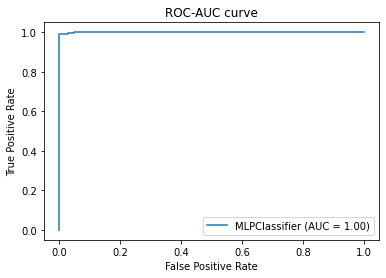

In [ ]:
import matplotlib.pyplot as plt 

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.title("ROC-AUC curve")
plt.show()

The BERT embeddings were successful in capturing the context and meaning of the extracted email text, which in combination with our extracted features resulted in such F-1 score of the model.